<h2></h2>
<h1 align='center'><b>Data Analysis</b></h1>
<h2></h2>
<p align='center'>
<img alt="stack" src="img/Gráficos/portada.jpg" width="75%">
</p>

### Importamos Librerías - Import Libraries

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Importamos DataSet - Import DataSet

In [56]:
dataStat = pd.read_csv("dataStat.csv", delimiter=";",index_col=False)

##### - Función para encontrar nulos como strings que representan nulos
##### - Function to find null as strings representing null

In [57]:
def buscar_nulos(tabla):
    print("-----------------")
    for col in tabla:
        ok = True
        if (tabla[col] == "").sum() != 0:
            print('""',col,(tabla[col] == "").sum())
            ok = False
        if (tabla[col] == " ").sum() != 0:
            print('" "',col,(tabla[col] == " ").sum())
            ok = False
        if (tabla[col].isna()).sum() != 0:
            print("Null",col,(tabla[col].isna()).sum())
            ok = False
        if (tabla[col] == "None").sum() != 0:
            print('"None"',col,(tabla[col] == "None").sum())
            ok = False
        if (tabla[col] == "nan").sum() != 0:
            print('"nan"',col,(tabla[col] == "nan").sum())
            ok = False
        if (tabla[col] == "NaN").sum() != 0:
            print('"NaN"',col,(tabla[col] == "NaN").sum())
            ok = False
        if ok:
            print(col,"- OK")
        print("-----------------")

buscar_nulos(dataStat)

-----------------
genres - OK
-----------------
Null original_language 11
-----------------
Null production_companies 11796
-----------------
production_countries - OK
-----------------
release_date - OK
-----------------
Null runtime 246
-----------------
Null tagline 24978
-----------------
title - OK
-----------------
vote_average - OK
-----------------


##### - Algunos tagline son nulos asi que se los identifica como "Desconocido"
##### - Some taglines are null so they are identified as "Unknown"

In [58]:
dataStat.dropna(subset=["original_language", "production_companies"], inplace=True)
dataStat["tagline"].fillna("Desconocido",inplace=True)

In [59]:
columna_title = dataStat.pop("title")  # Extraemos la columna "title" del DataFrame
dataStat.insert(0, "title", columna_title)  # Insertamos la columna en la posición 0

In [60]:
dataStat["release_date"] = pd.to_datetime(dataStat["release_date"])

In [61]:
# Paso 1: Dividir las filas con múltiples géneros en géneros individuales
dataStat["genres"] = dataStat["genres"].str.split(", ")

# Paso 2: Calcular el promedio total de rating para cada género
generos_ratings_promedio = dataStat.explode("genres").groupby("genres")["vote_average"].mean()

# Paso 3: Contar la cantidad de películas en las que está presente cada género
generos_cantidad_peliculas = dataStat.explode("genres").groupby("genres")["title"].count()   

# Paso 4: Crear un nuevo DataFrame con la información obtenida
genero_descripcion = pd.DataFrame({
    "genero": generos_ratings_promedio.index,
    "promedio_rating": generos_ratings_promedio.values,
    "cantidad_peliculas": generos_cantidad_peliculas.values
})

genero_descripcion.sort_values(by="promedio_rating", inplace=True, ascending=False)
genero_descripcion.reset_index(drop=True, inplace=True)
genero_descripcion.index = genero_descripcion.index + 1

### - Top 10 generos con mejor puntuación
### - Top 10 genres with the best score

In [62]:
genero_descripcion.head(10)

,genero,promedio_rating,cantidad_peliculas
1,Animation,6.374644,1613
2,History,6.263293,1166
3,Documentary,6.218657,1742
4,War,6.096157,1171
5,Drama,6.027850,16359
6,Music,5.979734,1204
7,Crime,5.967249,3719
8,Foreign,5.913906,827
9,Mystery,5.893974,2124
10,Romance,5.893756,5525


### - Top 5 idiomas mas utilizados
### - Top 5 most used languages

In [63]:
dataStat["original_language"] = dataStat["original_language"].str.split(", ")

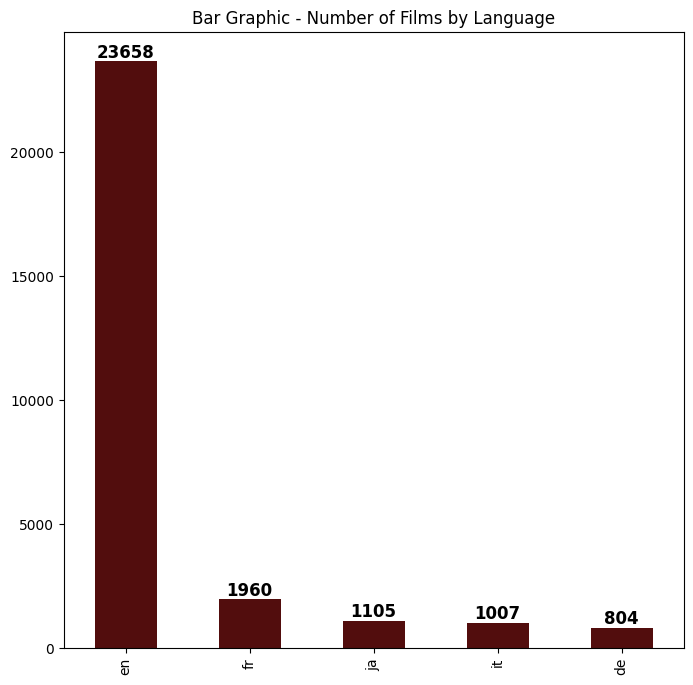

en    23658
fr     1960
ja     1105
it     1007
de      804
Name: original_language, dtype: int64

In [64]:
conteo_idiomas = dataStat["original_language"].explode().value_counts()

plt.figure(figsize=(8, 8))  # Establecer el tamaño del gráfico (opcional)
ax = conteo_idiomas.head(5).plot.bar(color="#520D0D")
# Agregar los valores de cantidad encima de las barras
for p in ax.patches:
    cantidad = f"{p.get_height():.0f}"
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), cantidad,
            ha='center', va='bottom', fontsize=12, color='black', weight='bold')
    
plt.title("Bar Graphic - Number of Films by Language")

# Mostrar el gráfico
plt.show()

conteo_idiomas.head(5)

### - Top 10 compañias con mayor cantidad de películas producidas
### - Top 10 companies with the largest number of films produced

In [65]:
# Suponiendo que "dataStats" es el DataFrame que contiene la información de las películas

# Paso 1: Dividir las filas con múltiples géneros en géneros individuales
dataStat["production_companies"] = dataStat["production_companies"].str.split(", ")

# Paso 3: Contar la cantidad de películas en las que está presente cada género
company_cantidad_peliculas = dataStat.explode("production_companies").groupby("production_companies")["title"].count()   

# Paso 4: Crear un nuevo DataFrame con la información obtenida
company_descripcion = pd.DataFrame({
    "Company": company_cantidad_peliculas.index,
    "Number of Movies": company_cantidad_peliculas.values
})

company_descripcion.sort_values(by="Number of Movies", inplace=True, ascending=False)
company_descripcion.reset_index(drop=True, inplace=True)
company_descripcion.index = company_descripcion.index + 1



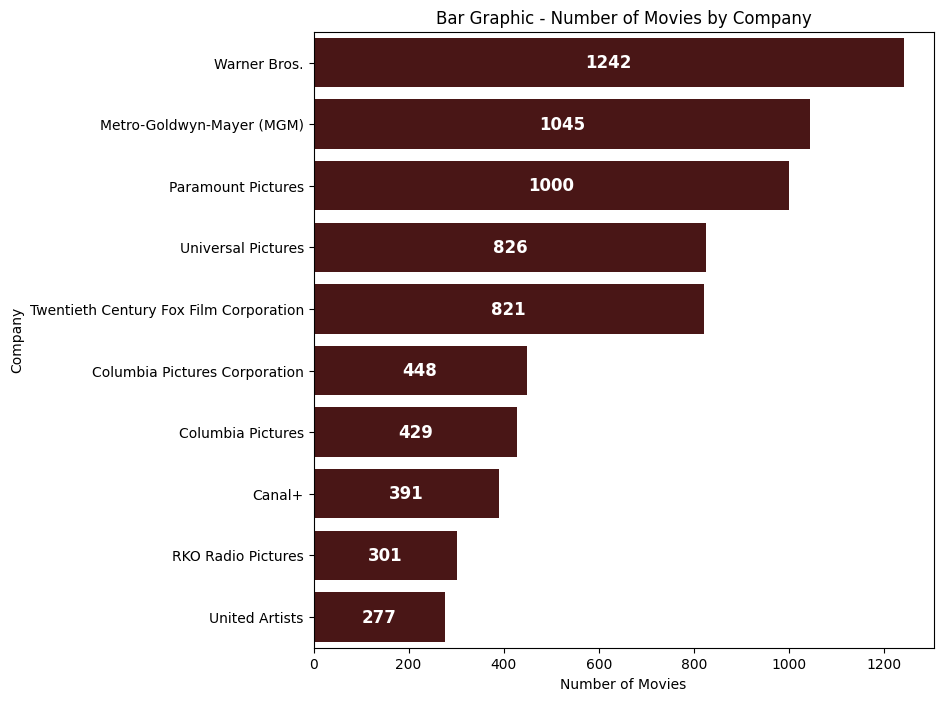

,Company,Number of Movies
1,Warner Bros.,1242
2,Metro-Goldwyn-Mayer (MGM),1045
3,Paramount Pictures,1000
4,Universal Pictures,826
5,Twentieth Century Fox Film Corporation,821
6,Columbia Pictures Corporation,448
7,Columbia Pictures,429
8,Canal+,391
9,RKO Radio Pictures,301
10,United Artists,277


In [66]:
plt.figure(figsize=(8, 8))  # Establecer el tamaño del gráfico (opcional)

ax = sns.barplot(x="Number of Movies", y="Company", color="#520D0D", data=company_descripcion.head(10))

#color="#520D0D"
# Agregar los valores de cantidad dentro de las barras
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='white', weight='bold')

# Configurar el título del gráfico
plt.title("Bar Graphic - Number of Movies by Company")
plt.show()

company_descripcion.head(10)

### - Top paises con mayor Cantidad de Películas producidas
### - Top countries with the largest number of films produced

In [67]:
# Suponiendo que "dataStats" es el DataFrame que contiene la información de las películas

# Paso 1: Dividir las filas con múltiples géneros en géneros individuales
dataStat["production_countries"] = dataStat["production_countries"].str.split(", ")

# Paso 3: Contar la cantidad de películas en las que está presente cada género
country_cantidad_peliculas = dataStat.explode("production_countries").groupby("production_countries")["title"].count()   

# Paso 4: Crear un nuevo DataFrame con la información obtenida
country_descripcion = pd.DataFrame({
    "Country": country_cantidad_peliculas.index,
    "Number of Movies": country_cantidad_peliculas.values
})

country_descripcion.sort_values(by="Number of Movies", inplace=True, ascending=False)
country_descripcion.reset_index(drop=True, inplace=True)
country_descripcion.index = country_descripcion.index + 1

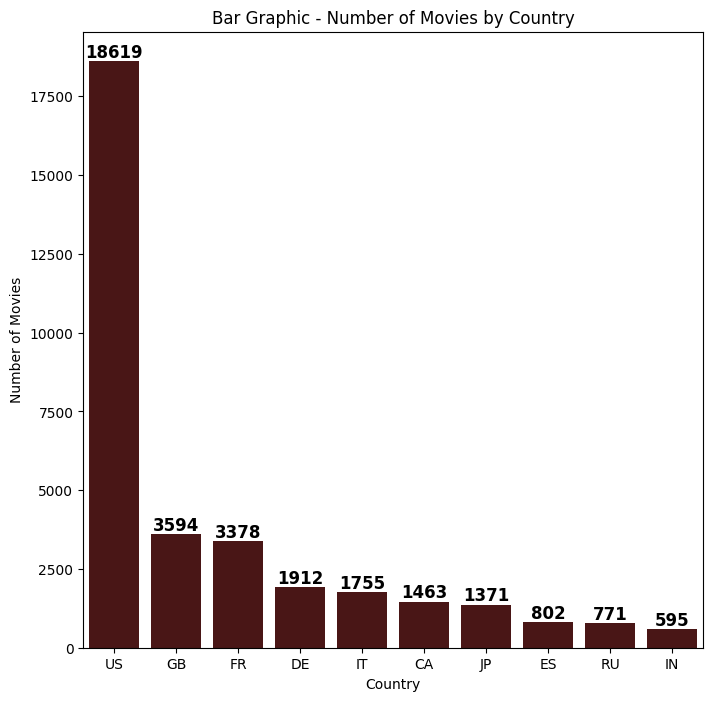

In [68]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 8))  # Establecer el tamaño del gráfico (opcional)
ax = sns.barplot(x="Country", y="Number of Movies", color="#520D0D", data=country_descripcion.head(10))

# Agregar los valores de cantidad encima de las barras
for p in ax.patches:
    cantidad = f"{p.get_height():.0f}"
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), cantidad,
            ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Configurar el título del gráfico
plt.title("Bar Graphic - Number of Movies by Country")

plt.show()



### - Línea de Tiempo por Año: Cantidad, Promedio de Votos y Duración Promedio de las Películas (Estandarizadas)
### - Timeline By Year - Number, Average Vote and Average Length of Movies (Standardized)

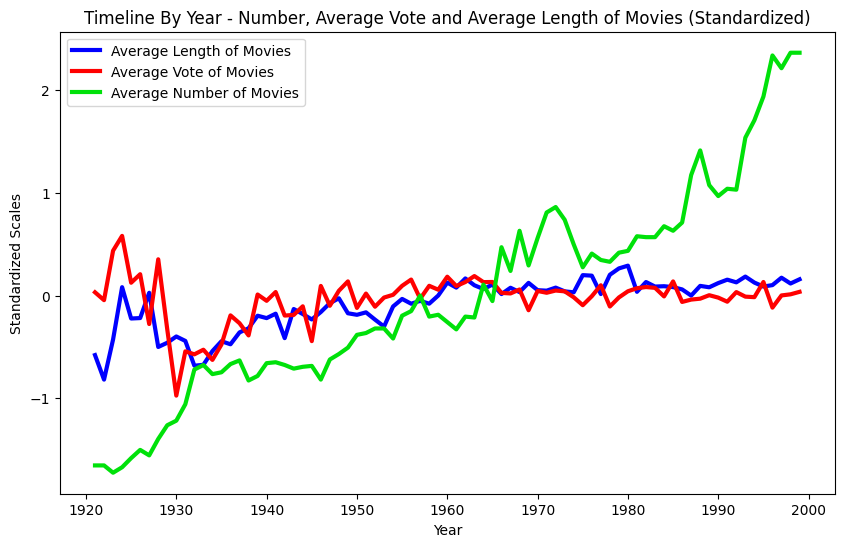

In [69]:
# Estandarizar la cantidad de películas y el vote average
scaler = StandardScaler()

dataStat["runtime_standardized"] = scaler.fit_transform(dataStat[["runtime"]])
dataStat["vote_average_standardized"] = scaler.fit_transform(dataStat[["vote_average"]])

filtered_data = dataStat[
    (dataStat["release_date"].dt.year > 1920) & (dataStat["release_date"].dt.year < 2000)
]

# Group the filtered data by the year and calculate the mean of the specified columns
grouped_data = filtered_data.groupby(filtered_data["release_date"].dt.year).agg(
    runtime_standardized=("runtime_standardized", "mean"),
    vote_average_standardized=("vote_average_standardized", "mean"),
    count_movie=("title", "count")
).reset_index()

grouped_data["count_movie"] = scaler.fit_transform(grouped_data[["count_movie"]])

# Crear la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(grouped_data["release_date"], grouped_data["runtime_standardized"], label="Average Length of Movies", linewidth=3, color="blue")
plt.plot(grouped_data["release_date"], grouped_data["vote_average_standardized"], label="Average Vote of Movies", linewidth=3, color="red")
plt.plot(grouped_data["release_date"], grouped_data["count_movie"], label="Average Number of Movies", linewidth=3, color="#00E10A")

# Configurar etiquetas y título del gráfico
plt.xlabel("Year")
plt.ylabel("Standardized Scales")
plt.title("Timeline By Year - Number, Average Vote and Average Length of Movies (Standardized)")

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [70]:
filtro_año = 2000

print("Year",filtro_año,"- Statistics")
print("- Average Duration: ", round((dataStat["runtime"][dataStat["release_date"].dt.year == filtro_año].mean()),2))
print("- Average Vote: ", round((dataStat["vote_average"][dataStat["release_date"].dt.year == filtro_año].mean()),2))
print("- Number of Movies: ", dataStat["title"][dataStat["release_date"].dt.year == filtro_año].count())


Year 2000 - Statistics
- Average Duration:  101.23
- Average Vote:  5.78
- Number of Movies:  500


### - Líneas de Tiempo (Mes y Días de la Semana) - Cantidad de Películas y Voto Promedio (Estandarizado)
### - Timelines (Month and WeekDay) - Number of Movies and Average Vote (Standardized)

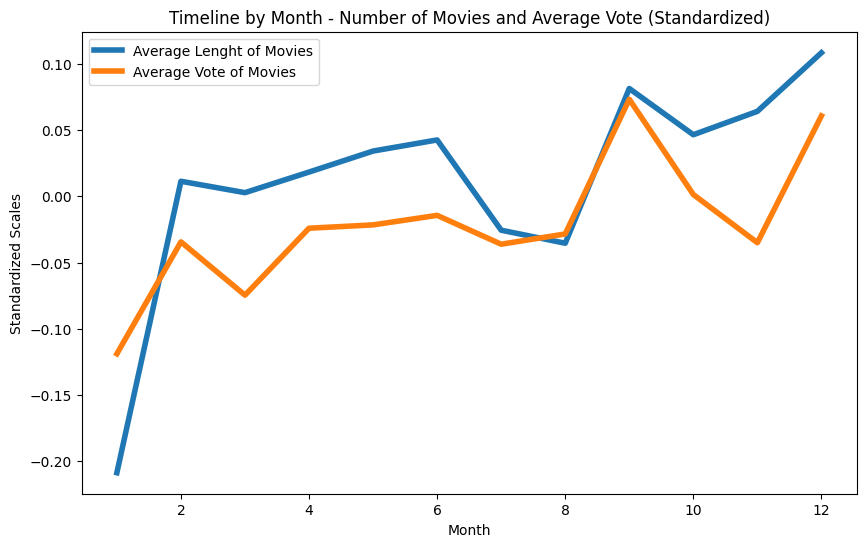

In [71]:
# Estandarizar la cantidad de películas y el vote average
scaler = StandardScaler()

dataStat["runtime_standardized"] = scaler.fit_transform(dataStat[["runtime"]])
dataStat["vote_average_standardized"] = scaler.fit_transform(dataStat[["vote_average"]])

filtered_data = dataStat[
    (dataStat["release_date"].dt.year > 1920) & (dataStat["release_date"].dt.year < 2000)
]

# Group the filtered data by the year and calculate the mean of the specified columns
grouped_data = filtered_data.groupby(filtered_data["release_date"].dt.month).agg(
    runtime_standardized=("runtime_standardized", "mean"),
    vote_average_standardized=("vote_average_standardized", "mean"),
    count_movie=("title", "count")
).reset_index()

grouped_data["count_movie"] = scaler.fit_transform(grouped_data[["count_movie"]])

# Crear la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(grouped_data["release_date"], grouped_data["runtime_standardized"], label="Average Lenght of Movies", linewidth=4)
plt.plot(grouped_data["release_date"], grouped_data["vote_average_standardized"], label="Average Vote of Movies", linewidth=4)

# Configurar etiquetas y título del gráfico
plt.xlabel("Month")
plt.ylabel("Standardized Scales")
plt.title("Timeline by Month - Number of Movies and Average Vote (Standardized)")

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

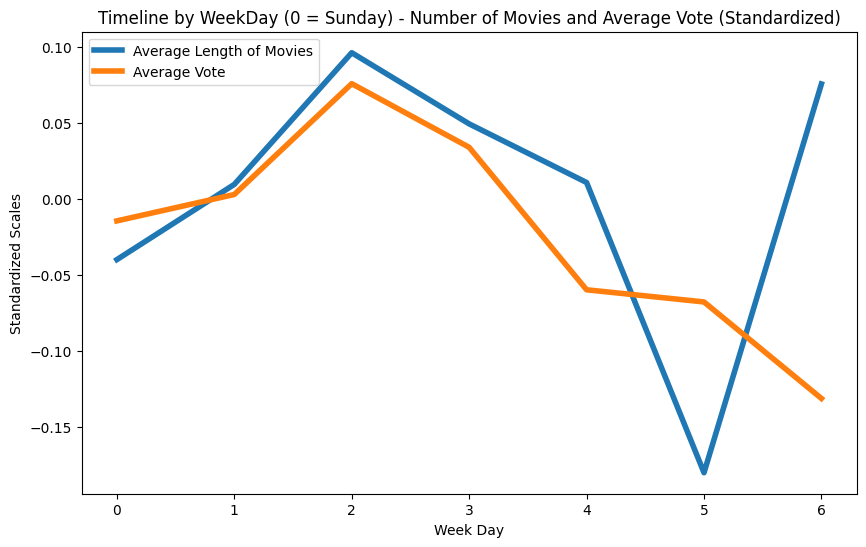

In [72]:
# Estandarizar la cantidad de películas y el vote average
scaler = StandardScaler()

dataStat["runtime_standardized"] = scaler.fit_transform(dataStat[["runtime"]])
dataStat["vote_average_standardized"] = scaler.fit_transform(dataStat[["vote_average"]])

filtered_data = dataStat[
    (dataStat["release_date"].dt.year > 1920) & (dataStat["release_date"].dt.year < 2000)
]

# Group the filtered data by the year and calculate the mean of the specified columns
grouped_data = filtered_data.groupby(filtered_data["release_date"].dt.weekday).agg(
    runtime_standardized=("runtime_standardized", "mean"),
    vote_average_standardized=("vote_average_standardized", "mean"),
    count_movie=("title", "count")
).reset_index()

grouped_data["count_movie"] = scaler.fit_transform(grouped_data[["count_movie"]])

# Crear la línea de tiempo
plt.figure(figsize=(10, 6))
plt.plot(grouped_data["release_date"], grouped_data["runtime_standardized"], label="Average Length of Movies", linewidth=4)
plt.plot(grouped_data["release_date"], grouped_data["vote_average_standardized"], label="Average Vote", linewidth=4)

# Configurar etiquetas y título del gráfico
plt.xlabel("Week Day")
plt.ylabel("Standardized Scales")
plt.title("Timeline by WeekDay (0 = Sunday) - Number of Movies and Average Vote (Standardized)")

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### - Voto Promedio basado en la Duración de las Películas
### - Average Vote based on the Duration of the Movies

In [73]:
tablaRunVote = dataStat[["runtime", "vote_average"]]

In [74]:
# Ordenar los datos por "runtime" de manera ascendente
tablaRunVote.sort_values(by="runtime", inplace=True)

# Calcular el promedio del vote average para cada valor único de "runtime"
tablaRunVote = tablaRunVote.groupby("runtime").mean().reset_index()

C:\Users\gonza\AppData\Local\Temp\ipykernel_2928\1454209544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tablaRunVote.sort_values(by="runtime", inplace=True)


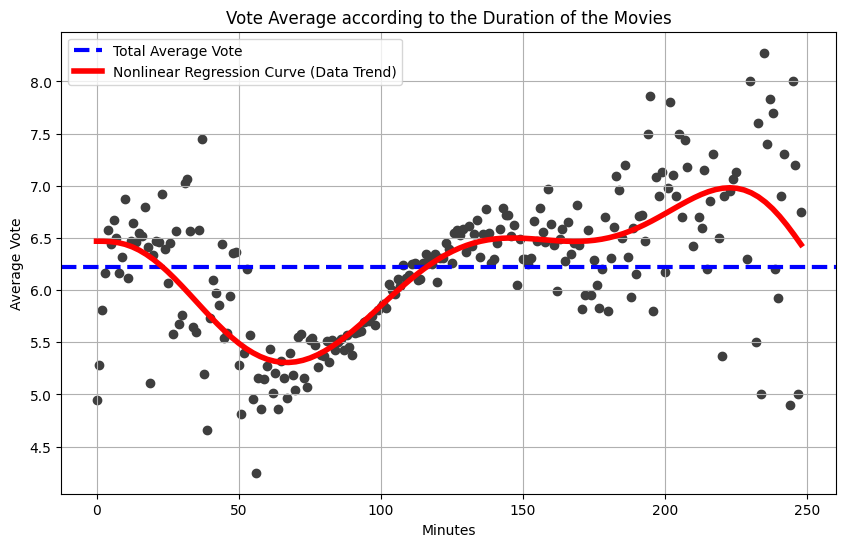

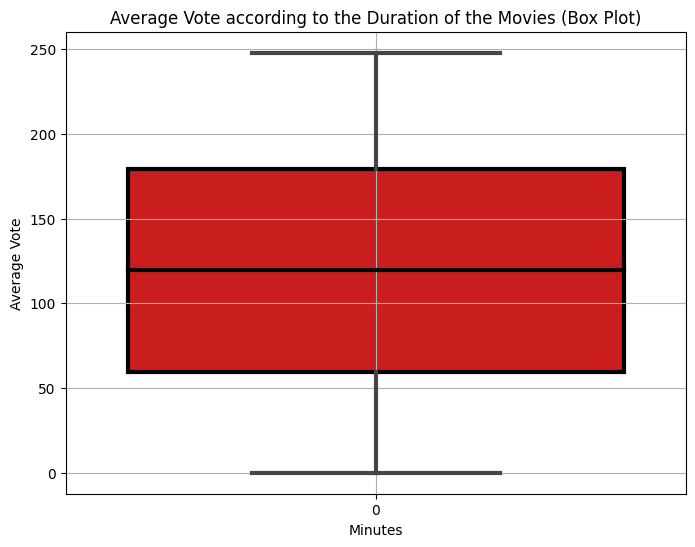

In [75]:
filtered_data = tablaRunVote[(tablaRunVote["runtime"] < 250) & (tablaRunVote["vote_average"] > 2)]

# Modelo de regresión polinomial
degree = 8  # Grado del polinomio (ajústalo según la complejidad que necesites)
X = filtered_data["runtime"].values.reshape(-1, 1)
y = filtered_data["vote_average"].values.reshape(-1, 1)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly, y)

# Predicción de valores para la curva de regresión polinomial
X_curve = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
y_curve = regressor.predict(X_curve_poly)

# Graficar los datos originales y la curva de regresión polinomial
plt.figure(figsize=(10, 6))

# Gráfico del promedio del vote average
plt.scatter(x = filtered_data["runtime"], y = filtered_data["vote_average"], color="#3E3E3E")
# Curva de regresión polinomial
plt.axhline(y=filtered_data["vote_average"].mean(), color='blue', linestyle='--', label="Total Average Vote", linewidth= 3)
plt.plot(X_curve, y_curve, color='red', linewidth=4, label="Nonlinear Regression Curve (Data Trend)")

plt.xlabel("Minutes")
plt.ylabel("Average Vote")
plt.title("Average Vote based on the Duration of the Movies")
plt.grid(True)
plt.legend()
plt.show()

# Crear el gráfico de bigote
plt.figure(figsize=(8, 6))
sns.boxplot(filtered_data["runtime"], color="#E70000", linewidth=3,  boxprops=dict(edgecolor="black"), medianprops=dict(color="black"))
plt.xlabel("Minutes")
plt.ylabel("Average Vote")
plt.title("Average Vote according to the Duration of the Movies (Box Plot)")
plt.grid(True)
plt.show()

In [76]:
red_words = dataStat[["tagline","vote_average"]]

In [77]:
red_words = red_words[red_words["tagline"]!="Desconocido"]
red_words.reset_index(inplace=True)
red_words.drop(columns="index", inplace=True)

In [78]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Descargar stopwords y punkt (esto solo es necesario la primera vez)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
def preprocess_text(text):
    # Convertir todo a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = ''.join([i for i in text if not i.isdigit()])
    # Tokenizar el texto en palabras
    words = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Unir las palabras en una sola cadena
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Aplicar la función de preprocesamiento a la columna "tagline"
red_words["tagline"] = red_words["tagline"].apply(preprocess_text)

In [85]:
# Preprocesar los datos
taglines = red_words['tagline'].values
vote_averages = red_words['vote_average'].values

# Tokenizar y convertir el texto en secuencias numéricas
tokenizer = Tokenizer()
tokenizer.fit_on_texts(taglines)
sequences = tokenizer.texts_to_sequences(taglines)

# Obtener la longitud máxima de secuencia
max_sequence_length = max(len(seq) for seq in sequences)

# Rellenar las secuencias para que tengan la misma longitud
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# Crear el modelo de la red neuronal
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(LSTM(40))  # Capa de entrada con 40 neuronas
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(sequences_padded, vote_averages, epochs=20, batch_size=32, validation_split=0.2)

# Obtener los pesos de la capa de embeddings
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

# Crear un diccionario inverso para mapear índices de palabras a palabras
word_index = tokenizer.word_index
index_to_word = {index: word for word, index in word_index.items()}

# Obtener los 20 pesos más importantes
top_20_weights_indices = np.argsort(np.abs(weights).mean(axis=1))[::-1][:20]

Epoch 1/20
443/443 [==============================] - 9s 17ms/step - loss: 3.3498 - val_loss: 3.7173
Epoch 2/20
443/443 [==============================] - 7s 16ms/step - loss: 1.6842 - val_loss: 3.8261
Epoch 3/20
443/443 [==============================] - 7s 17ms/step - loss: 1.5196 - val_loss: 3.4693
Epoch 4/20
443/443 [==============================] - 7s 16ms/step - loss: 1.2956 - val_loss: 3.6593
Epoch 5/20
443/443 [==============================] - 7s 15ms/step - loss: 1.1027 - val_loss: 3.5930
Epoch 6/20
443/443 [==============================] - 7s 15ms/step - loss: 0.9611 - val_loss: 3.8875
Epoch 7/20
443/443 [==============================] - 7s 15ms/step - loss: 0.8429 - val_loss: 3.8045
Epoch 8/20
443/443 [==============================] - 7s 15ms/step - loss: 0.7586 - val_loss: 3.8735
Epoch 9/20
443/443 [==============================] - 7s 16ms/step - loss: 0.7020 - val_loss: 4.0045
Epoch 10/20
443/443 [==============================] - 7s 16ms/step - loss: 0.6596 - val_lo

In [84]:
for top, index in enumerate(top_20_weights_indices):
    word = index_to_word[index]
    print(str(top+1) + "° - " +str(word))

1° - concert
2° - cheated
3° - haunting
4° - thaw
5° - ripped
6° - jesus
7° - columnist
8° - lennys
9° - documentary
10° - fearful
11° - musicomedy
12° - intrigue
13° - lovin
14° - wires
15° - gimli
16° - swedish
17° - prizes
18° - womenwith
19° - driver
20° - originality
